In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Spooky Author Identification

Kaggle competition info found [here](https://www.kaggle.com/c/spooky-author-identification)

## Getting the data

Setting up the kaggle CLI

In [2]:
! pip install kaggle --upgrade

    100% |████████████████████████████████| 61kB 37.6MB/s ta 0:00:01
    100% |████████████████████████████████| 245kB 37.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for kaggle ... done
  Stored in directory: /home/jupyter/.cache/pip/wheels/ee/97/c5/87dcdc9434fe4e632ed5945e31a03703af229db178ef6a00e8
  Running setup.py bdist_wheel for python-slugify ... done
  Stored in directory: /home/jupyter/.cache/pip/wheels/2b/9e/c8/14a18ab55d8f144384de8186a3df8401dcc9264936f71d470f
Successfully built kaggle python-slugify


Then you need to upload your credentials from Kaggle on your instance. Login to kaggle and click on your profile picture on the top left corner, then 'My account'. Scroll down until you find a button named 'Create New API Token' and click on it. This will trigger the download of a file named 'kaggle.json'.

Upload this file to the directory this notebook is running in, by clicking "Upload" on your main Jupyter page, then uncomment and execute the next two commands (or run them in a terminal). For Windows, uncomment the last two commands.

In [3]:
# ! mkdir -p ~/.kaggle/
# ! mv kaggle.json ~/.kaggle/

In [2]:
from fastai.text import *

In [3]:
Config.data_path()

PosixPath('/home/jupyter/.fastai/data')

In [4]:
path = Config.data_path()/'spooky-author'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/home/jupyter/.fastai/data/spooky-author')

In [11]:
# ! kaggle competitions download -c spooky-author-identification -p {path}

  0%|                                               | 0.00/29.4k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 29.4k/29.4k [00:00<00:00, 21.7MB/s]
  0%|                                                | 0.00/538k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 538k/538k [00:00<00:00, 122MB/s]
  0%|                                               | 0.00/1.26M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 1.26M/1.26M [00:00<00:00, 219MB/s]


In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/spooky-author/test.zip'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/train.zip'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/sample_submission.zip')]

In [6]:
# ! unzip /home/jupyter/.fastai/data/spooky-author/test.zip -d {path}

Archive:  /home/jupyter/.fastai/data/spooky-author/test.zip
  inflating: /home/jupyter/.fastai/data/spooky-author/test.csv  


In [7]:
# ! unzip /home/jupyter/.fastai/data/spooky-author/train.zip -d {path}

Archive:  /home/jupyter/.fastai/data/spooky-author/train.zip
  inflating: /home/jupyter/.fastai/data/spooky-author/train.csv  


In [8]:
# ! unzip /home/jupyter/.fastai/data/spooky-author/sample_submission.zip -d {path}

Archive:  /home/jupyter/.fastai/data/spooky-author/sample_submission.zip
  inflating: /home/jupyter/.fastai/data/spooky-author/sample_submission.csv  


In [9]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/spooky-author/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/train.csv'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/test.zip'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/sample_submission.csv'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/train.zip'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/sample_submission.zip')]

In [15]:
df_train = pd.read_csv(path/'train.csv')
df_train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [25]:
df_test = pd.read_csv(path/'test.csv')
df_test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [15]:
df_train['text'][0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [16]:
data_lm = TextDataBunch.from_csv(path, 'train.csv')

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:498: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
id00073, id26073, id11343, id08242, id08292...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [17]:
data_lm.save('lm-train')

Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

In [18]:
data = load_data(path, 'lm-train')

In [19]:
data = TextClasDataBunch.from_csv(path, 'train.csv')

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:498: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
id26073, id22978, id12963, id09332, id17310...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [20]:
data.show_batch()

text,target
xxbos xxmaj diotima approached the fountain seated herself on a mossy mound near it and her disciples placed themselves on the grass near her xxmaj without noticing me who sat close under her she continued her discourse addressing as it happened one or other of her listeners but before i attempt to repeat her words i will describe the chief of these whom she appeared to wish principally to impress,id27184
"xxbos xxmaj the xxmaj atlantic has been actually crossed in a xxmaj balloon and this too without difficulty without any great apparent danger with thorough control of the machine and in the inconceivably brief period of seventy five hours from shore to shore xxmaj by the energy of an agent at xxmaj charleston , xxup s.c. , we are enabled to be the first to furnish the public with a",id23023
"xxbos xxmaj mus go in to night , you know else there 'll be the d l to pay , and ' ' xxmaj and not a bit of pitch hot , ' interrupted the foreman , with a deep sigh , and an emphasis on the ' bit . ' ' xxmaj is it a long paragraph , xxmaj bob ? ' ' xxmaj should n't call it a",id20121
"xxbos "" xxmaj ugh ugh ugh "" chuckled xxmaj tarpaulin without heeding the general xxunk , "" xxwrep xxunk ugh i was saying , "" said he , "" i was saying when xxmaj mr. xxmaj king xxmaj pest xxunk in his xxunk xxunk , that as for the matter of two or three gallons more or less of xxmaj black xxmaj strap , it was a trifle to a",id25103
"xxbos xxmaj oh , no , no so go home at once , now , xxmaj john , to your odious old woods of xxmaj concord xxmaj go home to your woods , old owl go xxmaj you wo n't xxmaj oh , poh , poh , do n't do so xxmaj you 've got to go , you know xxmaj so go at once , and do n't go",id04353


In [22]:
df_train.columns

Index(['id', 'text', 'author'], dtype='object')

In [24]:
data = (TextList.from_csv(path, 'train.csv', cols='text')
           .random_split_by_pct(seed=42)
           .label_from_df(cols=2))

In [26]:
data

LabelLists;

Train: LabelList (15664 items)
x: TextList
xxbos xxmaj it never once occurred to me that the fumbling might be a mere mistake .,xxbos xxmaj in his left hand was a gold snuff box , from which , as he xxunk down the hill , cutting all manner of fantastic steps , he took snuff incessantly with an air of the greatest possible self satisfaction .,xxbos xxmaj finding nothing else , not even gold , the xxmaj superintendent abandoned his attempts ; but a perplexed look occasionally xxunk over his countenance as he sits thinking at his desk .,xxbos a youth passed in solitude , my best years spent under your gentle and feminine xxunk , has so refined the xxunk of my character that i can not overcome an intense distaste to the usual brutality exercised on board ship : i have never believed it to be necessary , and when i heard of a mariner equally noted for his xxunk of heart and the respect and obedience paid to him by his crew , i felt myself peculiarly fortunate in being able to s

In [30]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'train.csv')
data_lm.save('data_lm_1.pkl')

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:498: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
id11962, id12963, id17468, id07075, id21469...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [86]:
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, 'train.csv', vocab=data_lm.train_ds.vocab, bs=32, label_cols='author')
data_clas.save('data_clas_1.pkl')

In [62]:
data_lm = load_data(path, fname='data_lm_1.pkl')
data_clas = load_data(path, fname='data_clas_1.pkl', bs=16)

In [63]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [64]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


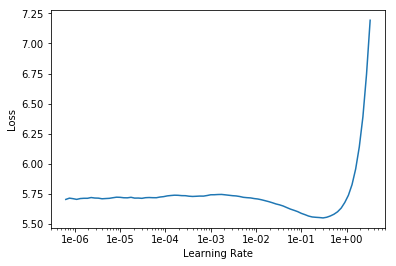

In [65]:
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(1, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
1,4.975711,4.523932,0.255588,00:28


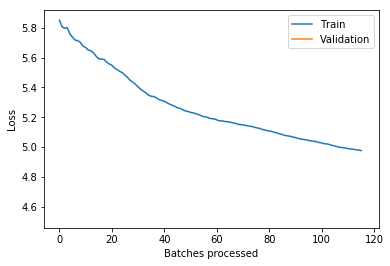

In [67]:
learn.recorder.plot_losses()

In [68]:
learn.predict('this is a test', n_words=10)

'this is a test so far dismal in a form is not that ye'

In [69]:
learn.unfreeze()

In [70]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
1,4.314919,4.385858,0.267041,00:36


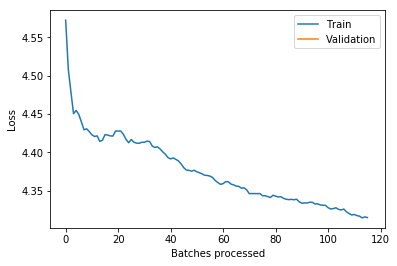

In [71]:
learn.recorder.plot_losses()

In [73]:
learn.predict('this is a test', n_words=20)

'this is a test of ascent on the vice continent , and a somewhat distinct insurance of ground with Oxford . xxbos'

In [74]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
1,4.205927,4.382878,0.267565,00:35


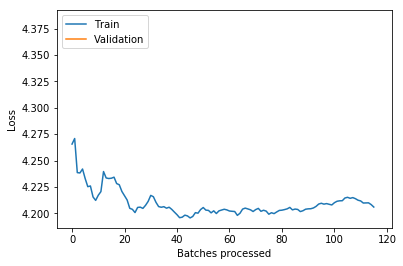

In [75]:
learn.recorder.plot_losses()

In [76]:
learn.predict('this is a test', n_words=20)

'this is a test , alike , the a paragraph connected with other non crossings , an simple account of frequent run of a'

In [77]:
learn.save_encoder('ft_enc')

In [87]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

In [88]:
data_clas.show_batch()

text,target
xxbos xxmaj diotima approached the fountain seated herself on a mossy mound near it and her disciples placed themselves on the grass near her xxmaj without noticing me who sat close under her she continued her discourse addressing as it happened one or other of her listeners but before i attempt to repeat her words i will describe the chief of these whom she appeared to wish principally to impress,MWS
xxbos xxmaj it was in xxmaj rome the xxmaj queen of the xxmaj world that i suffered a misfortune that reduced me to misery despair xxmaj the bright sun deep azure sky were oppressive but nought was so hateful as the voice of xxmaj man i loved to walk by the shores of the xxmaj tiber which were solitary if the xxunk blew to see the swift clouds pass over,MWS
"xxbos xxmaj the xxmaj baron , who had been unusually silent and abstracted in the earlier portion of the evening , at length seemed to be aroused from his apathy , took a leading part in the discourse , and dwelt upon the benefits , and more especially upon the beauties , of the received code of etiquette in passages of arms with an ardor , an eloquence , an",EAP
"xxbos ' xxmaj and one part , ' too , ' was the hem of the frock ' xxmaj another piece was ' part of the xxunk , not the hem , ' that is to say , was torn completely out through the agency of thorns , from the xxunk interior of the dress xxmaj these , i say , are things which one may well be pardoned for",EAP
"xxbos xxmaj some , in the true spirit of reckless enterprise , went on board a ship of an hundred and twenty guns ; the vast hull drifted with the tide out of the bay , and after many hours its crew of xxunk contrived to spread a great part of her enormous canvass the wind took it , and while a thousand mistakes of the xxunk made her present",MWS


In [89]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


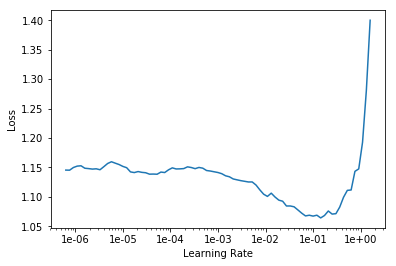

In [90]:
learn.recorder.plot()

In [91]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.895122,0.743845,0.679775,00:26


In [92]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
1,0.805624,0.655977,0.722421,00:31


In [93]:
learn.predict('this is a test of ascent on the vice continent, and a somewhat distinct insurance of ground with Oxford.')

(<fastai.core.Category at 0x7f4e29d2a978>,
 tensor(0),
 tensor([0.7919, 0.0982, 0.1099]))

In [94]:
learn.metrics

[<function fastai.metrics.accuracy(input: torch.Tensor, targs: torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f4e906e3950>>]

In [95]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
1,0.751893,0.613557,0.742594,01:01


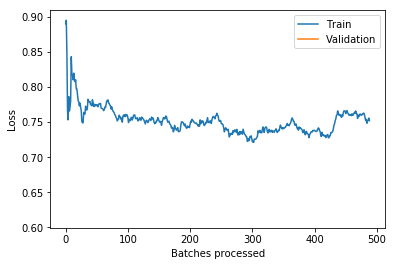

In [96]:
learn.recorder.plot_losses()

In [97]:
log(0.61)

-0.4942963218147801

In [100]:
sample_sub = pd.read_csv(path/'sample_submission.csv')
sample_sub.head()

,id,EAP,HPL,MWS
0,id02310,0.403494,0.287808,0.308698
1,id24541,0.403494,0.287808,0.308698
2,id00134,0.403494,0.287808,0.308698
3,id27757,0.403494,0.287808,0.308698
4,id04081,0.403494,0.287808,0.308698


In [101]:
len(df_test)

8392

In [104]:
df_test.head(1)

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."


In [105]:
df_test['text'][0]

'Still, as I urged our leaving Ireland with such inquietude and impatience, my father thought it best to yield.'

In [106]:
learn.predict(df_test['text'][0])

(<fastai.core.Category at 0x7f4e23673128>,
 tensor(2),
 tensor([0.1711, 0.3204, 0.5085]))

In [107]:
learn.predict(df_test['text'][0])[0]

In [108]:
learn.save('class-predictor-1')

In [109]:
df_train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [110]:
learn.get_preds('test')

[tensor([[0.0904, 0.1515, 0.7581],
         [0.0546, 0.0904, 0.8551],
         [0.0483, 0.1180, 0.8338],
         ...,
         [0.7640, 0.1205, 0.1155],
         [0.6352, 0.2292, 0.1356],
         [0.1217, 0.2680, 0.6103]]), tensor([2, 2, 2,  ..., 0, 0, 0])]

In [111]:
learn.predict(df_train['text'][0])

(<fastai.core.Category at 0x7f4e2086e0f0>,
 tensor(0),
 tensor([0.8549, 0.0849, 0.0602]))

In [112]:
learn.predict(df_train['text'][1])

(<fastai.core.Category at 0x7f4e2365efd0>,
 tensor(1),
 tensor([0.3551, 0.5856, 0.0593]))

In [113]:
learn.predict(df_train['text'][3])

(<fastai.core.Category at 0x7f4e21102fd0>,
 tensor(2),
 tensor([0.0206, 0.1640, 0.8154]))

In [122]:
learn.predict(df_test['text'][1])

(<fastai.core.Category at 0x7f4e28b72d30>,
 tensor(0),
 tensor([0.9741, 0.0181, 0.0078]))

In [121]:
float(learn.predict(df_test['text'][1])[2][0])

0.9741127490997314

In [161]:
preds = []
for i,row in df_test.iterrows():
    pred = learn.predict(row['text'])[2]
    [EAP, HPL, MWS] = [float(i) for i in pred]
    preds.append({ 'id': row['id'], 'EAP': EAP, 'HPL': HPL, 'MWS': MWS })

In [162]:
submission = pd.DataFrame(preds, columns=['id', 'EAP', 'HPL', 'MWS'])

In [163]:
submission.head()

,id,EAP,HPL,MWS
0,id02310,0.171052,0.320428,0.508520
1,id24541,0.974113,0.018083,0.007804
2,id00134,0.028587,0.950854,0.020560
3,id27757,0.121153,0.654536,0.224311
4,id04081,0.356734,0.167769,0.475497


In [164]:
len(submission)

8392

In [166]:
submission.to_csv('/home/jupyter/tutorials/fastai/personal-learning/submission-1.csv', index=False)

## Try 2 

Datablock API

In [8]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/spooky-author/lm-train'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/models'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/data_clas_1.pkl'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/train.csv'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/test.zip'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/sample_submission.csv'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/data_lm_1.pkl'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/train.zip'),
 PosixPath('/home/jupyter/.fastai/data/spooky-author/sample_submission.zip')]

In [17]:
df_train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [18]:
df_test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [12]:
TextList.from_csv??

In [14]:
TextList.from_df??

In [21]:
bs = 64

In [20]:
data_lm = (TextList.from_csv(path, 'train.csv', cols='text')
              .random_split_by_pct(0.1, seed=42)
              .label_for_lm()
              .add_test(TextList.from_csv(path, 'test.csv', cols='text'))
              .databunch())
data_lm.save('data_lm.pkl')

In [22]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [23]:
data_lm.show_batch()

idx,text
0,"his left hand was a gold snuff box , from which , as he xxunk down the hill , cutting all manner of fantastic steps , he took snuff incessantly with an air of the greatest possible self satisfaction . xxbos xxmaj finding nothing else , not even gold , the xxmaj superintendent abandoned his attempts ; but a perplexed look occasionally xxunk over his countenance as he sits thinking"
1,"vain xxunk , and a hectic quest from place to place , hither and thither by subway and surface car . xxbos i soon arrived at the hut : the door was ajar . xxbos xxmaj who or what then , was my great great grandmother ? xxbos xxmaj for a moment i was almost xxunk by fear ; but my energy returned and i demanded a guide to accompany"
2,"was or what i was doing . xxbos xxmaj in the present instance , had the gold been gone , the fact of its delivery three days before would have formed something more than a coincidence . xxbos "" xxmaj c'est à xxunk à xxunk , "" said his xxmaj majesty , cutting . xxbos i was weary with watching and for some time i had xxunk with the heavy"
3,"away . xxbos xxmaj in truth , much as the owners of cats hated these odd folk , they feared them more ; and instead of xxunk them as brutal assassins , merely took care that no cherished pet or xxunk should stray toward the remote hovel under the dark trees . xxbos xxmaj with the lady in question this portion proved to be the mouth . xxbos xxmaj but"
4,"all was again silent , but his words rang in my ears . xxbos xxmaj close to the spot on which we stood , was a solitary rock , high and conical , which , divided on every side from the mountain , seemed a nature hewn pyramid ; with little labour this block was reduced to a perfect shape ; the narrow cell was xxunk out beneath in which"


In [24]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


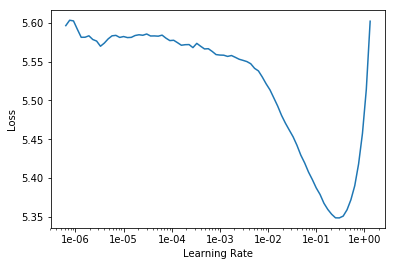

In [28]:
learn.recorder.plot(skip_end=10)

In [29]:
learn.fit_one_cycle(1, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,4.600076,4.282691,0.269955,00:26


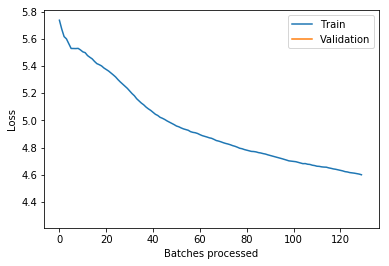

In [32]:
learn.recorder.plot_losses()

In [33]:
learn.save('fit_head.pkl')

In [34]:
learn.fit_one_cycle(1, 3e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,4.084071,4.236996,0.272902,00:27


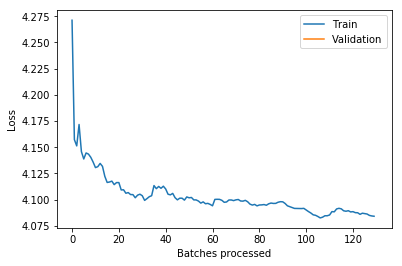

In [35]:
learn.recorder.plot_losses()

In [36]:
learn.save('fit_head.pkl')

In [37]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
1,4.031489,4.181341,0.278958,00:28


In [38]:
learn.predict('this is a test', n_words=10)

'this is a test as it is partly a part of those materials ;'

In [39]:
learn.predict('As I turned the', n_words=10)

'As I turned the contents of my competition towards the city itself , i'

In [40]:
learn.save('lm_fit_2.pkl')

In [41]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,3.838599,4.178346,0.278214,00:28
2,3.803904,4.173546,0.278943,00:28
3,3.767294,4.163431,0.279360,00:28
4,3.706307,4.158224,0.280074,00:29
5,3.634313,4.159141,0.278423,00:29
6,3.560993,4.163426,0.279316,00:29
7,3.509160,4.166932,0.278914,00:29
8,3.460258,4.173293,0.278155,00:29
9,3.426068,4.174786,0.279152,00:29
10,3.406708,4.176445,0.278690,00:29


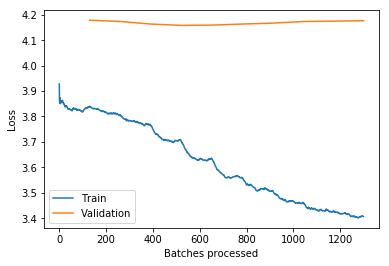

In [42]:
learn.recorder.plot_losses()

In [44]:
TEXT = "He began the process of"
N_WORDS = 40
N_SENTENCES = 2

In [45]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

He began the process of referring stolen resources to the works of all mankind , and finally saw the substance and substance of the veins , the atmosphere , and atmosphere . xxbos In these few words i had arrived at my work ,
He began the process of an progressive , very modulated , float , and Spanish phrase , more particularly that which used a term for a theory which might suggest a general notion of a Spanish . xxbos i had never heard of


In [46]:
learn.save('lm_fine_tuned_1.pkl')

In [47]:
learn.save_encoder('fine_tuned_enc.pkl')

### Classifier

In [5]:
bs = 48

In [50]:
data_lm.train_ds.vocab

In [61]:
data_clas = (TextList.from_csv(path, 'train.csv', cols='text', vocab=data_lm.train_ds.vocab)
                .random_split_by_pct(0.1, seed=42)
                .label_from_df(cols='author')
                .add_test(TextList.from_csv(path, 'test.csv', cols='text'))
                .databunch())
data_clas.save('data_clas_2.pkl')

In [6]:
data_clas = load_data(path, 'data_clas_2.pkl', bs=bs)

In [9]:
data_clas.show_batch()

text,target
xxbos xxmaj diotima approached the fountain seated herself on a mossy mound near it and her xxunk placed themselves on the grass near her xxmaj without noticing me who sat close under her she continued her discourse addressing as it happened one or other of her listeners but before i attempt to repeat her words i will describe the chief of these whom she appeared to wish principally to impress,MWS
"xxbos xxmaj mus go in to night , you know else there 'll be the d l to pay , and ' ' xxmaj and not a bit of pitch hot , ' interrupted the foreman , with a deep sigh , and an emphasis on the ' bit . ' ' xxmaj is it a long paragraph , xxmaj bob ? ' ' xxmaj should n't call it a",EAP
"xxbos i continued the story : "" xxmaj but the good xxunk xxmaj ethelred , now entering within the door , was sore enraged and amazed to perceive no signal of the xxunk hermit ; but , in the stead xxunk , a dragon of a scaly and prodigious demeanor , and of a fiery tongue , which sate in guard before a palace of gold , with a floor",EAP
"xxbos xxmaj grey headed men , ye hoped for yet a few years in your long known abode but the lease is up , you must remove children , ye will never reach maturity , even now the small grave is dug for ye mothers , clasp them in your arms , one death xxunk you "" xxmaj shuddering , he stretched out his hands , his eyes cast up",MWS
"xxbos xxmaj the margin of the river , and of the many dazzling xxunk that glided through devious ways into its channel , as well as the spaces that extended from the xxunk away down into the depths of the streams until they reached the bed of pebbles at the bottom , these spots , not less than the whole surface of the valley , from the river to the",EAP


In [7]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc.pkl')

In [65]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


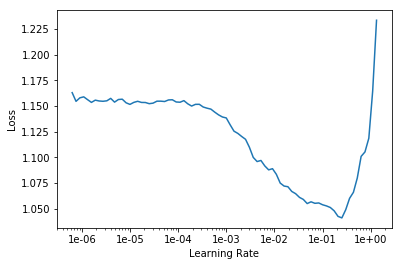

In [66]:
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(1, 5e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.875751,0.714198,0.696985,00:18


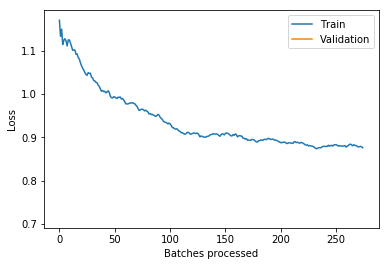

In [68]:
learn.recorder.plot_losses()

In [69]:
learn.save('clas_1.pkl')

In [70]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.873770,0.712521,0.701584,00:20


In [71]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.871472,0.694319,0.713337,00:19
2,0.858934,0.679799,0.715381,00:19
3,0.867532,0.697357,0.707716,00:20
4,0.844834,0.713786,0.697496,00:19
5,0.857040,0.685575,0.708227,00:20


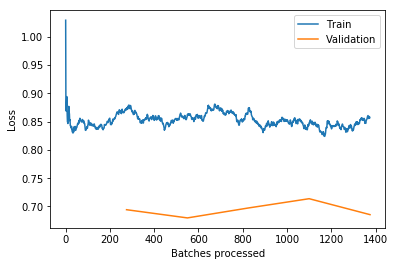

In [72]:
learn.recorder.plot_losses()

In [73]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.817423,0.631910,0.728666,00:23


In [74]:
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.774127,0.597610,0.741952,00:23


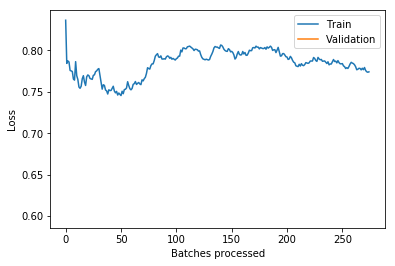

In [75]:
learn.recorder.plot_losses()

In [76]:
learn.save('clas_2.pkl')

In [77]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.772024,0.598559,0.743485,00:23
2,0.705084,0.556400,0.759836,00:23
3,0.668588,0.536216,0.774655,00:24


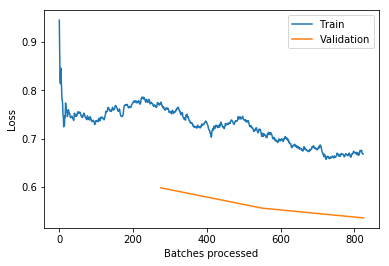

In [78]:
learn.recorder.plot_losses()

In [79]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.660149,0.525985,0.778232,00:39


In [80]:
learn.fit_one_cycle(2, slice(2e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.660718,0.517039,0.785386,00:39
2,0.620741,0.501404,0.792029,00:40


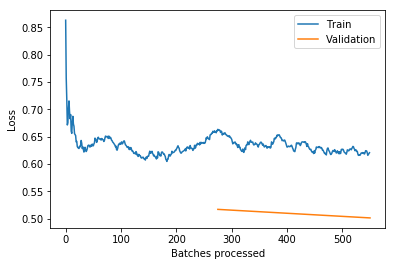

In [81]:
learn.recorder.plot_losses()

In [82]:
learn.fit_one_cycle(3, slice(2e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.629011,0.499853,0.798160,00:40
2,0.603542,0.480276,0.803270,00:39
3,0.569201,0.469508,0.812468,00:40


In [83]:
learn.save('clas_3.pkl')

In [84]:
learn.fit_one_cycle(3, slice(2e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.599005,0.529497,0.790496,00:42
2,0.575111,0.460224,0.812979,00:42
3,0.515735,0.451312,0.814001,00:40


In [87]:
learn.save('clas_4.pkl')

In [11]:
learn.load('clas_4.pkl')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (17622 items)
x: TextList
xxbos xxmaj this process , however , afforded me no means of ascertaining the dimensions of my dungeon ; as i might make its circuit , and return to the point whence i set out , without being aware of the fact ; so perfectly uniform seemed the wall .,xxbos xxmaj it never once occurred to me that the fumbling might be a mere mistake .,xxbos xxmaj in his left hand was a gold snuff box , from which , as he xxunk down the hill , cutting all manner of fantastic steps , he took snuff incessantly with an air of the greatest possible self satisfaction .,xxbos xxmaj finding nothing else , not even gold , the xxmaj superintendent abandoned his attempts ; but a perplexed look occasionally xxunk over his countenance as he sits thinking at his desk .,xxbos a youth passed in solitude , my best years spent under your gentle and feminine xxunk , has so refined the xxunk of my character that i can not overcome an intense dis

In [12]:
learn.data.batch_size

48

In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.506780,0.452953,0.811446,00:58
2,0.509520,0.444595,0.821155,00:56


In [15]:
learn.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.497533,0.442095,0.814512,00:58
2,0.500199,0.435289,0.822688,01:03
3,0.448771,0.433574,0.825754,01:00
4,0.407431,0.431271,0.825243,01:03
5,0.436208,0.433633,0.823710,00:59


In [16]:
learn.save('clas_5.pkl')

In [8]:
learn.load('clas_5.pkl')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (17622 items)
x: TextList
xxbos xxmaj this process , however , afforded me no means of ascertaining the dimensions of my dungeon ; as i might make its circuit , and return to the point whence i set out , without being aware of the fact ; so perfectly uniform seemed the wall .,xxbos xxmaj it never once occurred to me that the fumbling might be a mere mistake .,xxbos xxmaj in his left hand was a gold snuff box , from which , as he xxunk down the hill , cutting all manner of fantastic steps , he took snuff incessantly with an air of the greatest possible self satisfaction .,xxbos xxmaj finding nothing else , not even gold , the xxmaj superintendent abandoned his attempts ; but a perplexed look occasionally xxunk over his countenance as he sits thinking at his desk .,xxbos a youth passed in solitude , my best years spent under your gentle and feminine xxunk , has so refined the xxunk of my character that i can not overcome an intense dis

In [9]:
learn.recorder.plot_losses()

AttributeError: 'RNNLearner' object has no attribute 'recorder'

In [10]:
learn.fit_one_cycle(5, slice(1e-4/(2.6**4),1e-4), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.453146,0.430786,0.824221,00:24
2,0.436881,0.432750,0.824221,00:24
3,0.430576,0.430444,0.825243,00:24
4,0.412984,0.430752,0.824732,00:24
5,0.424211,0.423680,0.825754,00:23


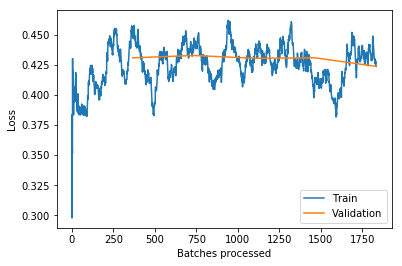

In [11]:
learn.recorder.plot_losses()

In [12]:
learn.fit_one_cycle(5, slice(1e-4/(2.6**4),1e-4), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.401286,0.430692,0.825243,00:24
2,0.448491,0.425195,0.824732,00:23
3,0.405272,0.432522,0.825754,00:24
4,0.437801,0.436378,0.821666,00:24
5,0.415109,0.431554,0.822688,00:25


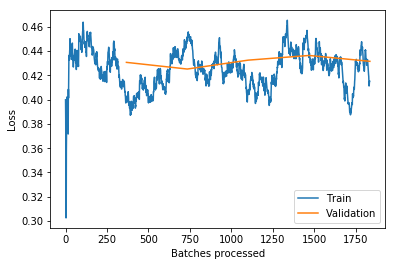

In [13]:
learn.recorder.plot_losses()

In [14]:
learn.save('clas_6.pkl')

In [49]:
learn.export()

In [22]:
preds, targets = learn.get_preds(ds_type=DatasetType.Test)

In [17]:
preds[:10]

tensor([[4.8151e-02, 7.2782e-02, 8.7907e-01],
        [1.1920e-02, 9.9453e-03, 9.7813e-01],
        [6.4844e-03, 1.3434e-02, 9.8008e-01],
        [9.6674e-03, 9.5985e-01, 3.0486e-02],
        [9.9708e-01, 1.8256e-03, 1.0971e-03],
        [2.6977e-01, 1.2702e-01, 6.0321e-01],
        [9.9957e-01, 3.5628e-04, 6.9572e-05],
        [9.6896e-01, 2.6353e-02, 4.6829e-03],
        [2.5570e-01, 5.9761e-02, 6.8454e-01],
        [4.8066e-03, 1.7743e-03, 9.9342e-01]])

In [24]:
len(targets)

8392

In [26]:
len(df_test)

8392

In [27]:
df_test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [46]:
learn.data.classes

['EAP', 'HPL', 'MWS']

In [30]:
df_test.iloc[0]['id']

'id02310'

Assuming that the ordering is the same in the preds and the original test csv

In [40]:
formatted = []
for i,pred in enumerate(preds):
    [EAP, HPL, MWS] = [float(p) for p in pred]
    formatted.append({ 'id': df_test.iloc[i]['id'], 'EAP': EAP, 'HPL': HPL, 'MWS': MWS })

In [41]:
formatted[0]

{'id': 'id02310',
 'EAP': 0.048151228576898575,
 'HPL': 0.07278190553188324,
 'MWS': 0.8790668845176697}

In [42]:
submission = pd.DataFrame(formatted, columns=['id', 'EAP', 'HPL', 'MWS'])

In [43]:
submission.head()

,id,EAP,HPL,MWS
0,id02310,0.048151,0.072782,0.879067
1,id24541,0.011920,0.009945,0.978135
2,id00134,0.006484,0.013434,0.980082
3,id27757,0.009667,0.959846,0.030486
4,id04081,0.997077,0.001826,0.001097


In [44]:
submission.to_csv('submission-2.csv', index=False)

In [45]:
! kaggle competitions submit spooky-author-identification -f ./submission-2.csv -m "Attempt 2"

100%|█████████████████████████████████████████| 562k/562k [00:04<00:00, 138kB/s]
Successfully submitted to Spooky Author Identification

Something is messed up with my submission the rating is 3.04

In [64]:
test = TextList.from_csv(path, 'test.csv', cols='text', vocab=data_clas.train_ds.vocab)
len(test)

8392

In [65]:
learn = load_learner(path, test=test)

In [66]:
preds, targets = learn.get_preds(ds_type=DatasetType.Test)

In [67]:
preds[:10]

tensor([[4.8151e-02, 7.2782e-02, 8.7907e-01],
        [1.1920e-02, 9.9453e-03, 9.7813e-01],
        [6.4844e-03, 1.3434e-02, 9.8008e-01],
        [9.6674e-03, 9.5985e-01, 3.0486e-02],
        [9.9708e-01, 1.8257e-03, 1.0971e-03],
        [2.6977e-01, 1.2702e-01, 6.0321e-01],
        [9.9957e-01, 3.5628e-04, 6.9572e-05],
        [9.6896e-01, 2.6353e-02, 4.6829e-03],
        [2.5570e-01, 5.9761e-02, 6.8454e-01],
        [4.8066e-03, 1.7743e-03, 9.9342e-01]])

In [59]:
learn.data.classes

['EAP', 'HPL', 'MWS']

In [68]:
preds2 = []
for i,row in df_test.iterrows():
    pred = learn.predict(row['text'])[2]
    [EAP, HPL, MWS] = [float(i) for i in pred]
    preds2.append({ 'id': row['id'], 'EAP': EAP, 'HPL': HPL, 'MWS': MWS })

In [69]:
preds2[:5]

[{'id': 'id02310',
  'EAP': 0.027344733476638794,
  'HPL': 0.4085843861103058,
  'MWS': 0.5640708804130554},
 {'id': 'id24541',
  'EAP': 0.9987282156944275,
  'HPL': 0.0008878023363649845,
  'MWS': 0.0003839197743218392},
 {'id': 'id00134',
  'EAP': 0.0005948206526227295,
  'HPL': 0.9982175230979919,
  'MWS': 0.0011875720228999853},
 {'id': 'id27757',
  'EAP': 0.11069606244564056,
  'HPL': 0.08276043087244034,
  'MWS': 0.8065434694290161},
 {'id': 'id04081',
  'EAP': 0.32176685333251953,
  'HPL': 0.37255942821502686,
  'MWS': 0.30567365884780884}]

In [62]:
data_clas.train_ds.vocab

In [72]:
submission = pd.DataFrame(preds2, columns=['id', 'EAP', 'HPL', 'MWS'])

In [73]:
submission.head()

,id,EAP,HPL,MWS
0,id02310,0.027345,0.408584,0.564071
1,id24541,0.998728,0.000888,0.000384
2,id00134,0.000595,0.998218,0.001188
3,id27757,0.110696,0.082760,0.806543
4,id04081,0.321767,0.372559,0.305674


In [74]:
submission.to_csv('submission-2.csv', index=False)

In [75]:
! kaggle competitions submit spooky-author-identification -f ./submission-2.csv -m "Attempt 2 - formatting take 2"

100%|█████████████████████████████████████████| 562k/562k [00:04<00:00, 127kB/s]
Successfully submitted to Spooky Author Identification

682 out of 1244 = 54.8% in private leaderboard